In [1]:
import os
import pandas as pd
import numpy as np
import gc
from tqdm import tqdm

# Connection to drive

In [ ]:
try:
    from google.colab import drive
    IN_COLAB = True
    print("Running on Google Colab. ")
except:
    IN_COLAB = False
    print("Not running on Google Colab. ")

In [ ]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')

In [ ]:
if IN_COLAB:
    os.chdir('/content/gdrive/MyDrive/Tesi/dataset')
else:
    os.chdir('./dataset')

In [ ]:
encoded_dataset = './LUFlow/encoded_dataset.csv'

In [ ]:
import pandas as pd

# Count number of lines in the file
with open(encoded_dataset) as f:
    total_rows = sum(1 for _ in f) - 1  # exclude header

# Compute the fraction
n_quarter_rows = total_rows // 300

# Load only first quarter of the dataset
df = pd.read_csv(encoded_dataset, nrows=n_quarter_rows)

In [ ]:
perc = 0.8

rows_perc = int(len(df)*perc)

df_test = df.iloc[rows_perc:]

In [ ]:
# Separate features (X) and target variable (y)
X_test = df_test.loc[:, df_test.columns != 'label']
y_test = df_test['label']


del df_test
gc.collect()

## Clustering 1/300

In [5]:
import matplotlib.pyplot as plt
import re

time_slices = [16, 128, 256, 1024, 2048, 3016]

In [7]:
best_models_dir = 'G:/Il mio Drive/Tesi/risultati/reports/clustering_300_20241120-093647'

report_clust = {}

for model in tqdm(os.listdir(best_models_dir)):
    if 'report' not in model:
        continue

    file_path = os.path.join(best_models_dir, model)
    number = int(re.search(r'\d+', model).group())
    
    report_clust[number] = pd.read_csv(file_path, index_col=0, float_precision='high')

100%|██████████| 7/7 [00:00<00:00, 27.47it/s]


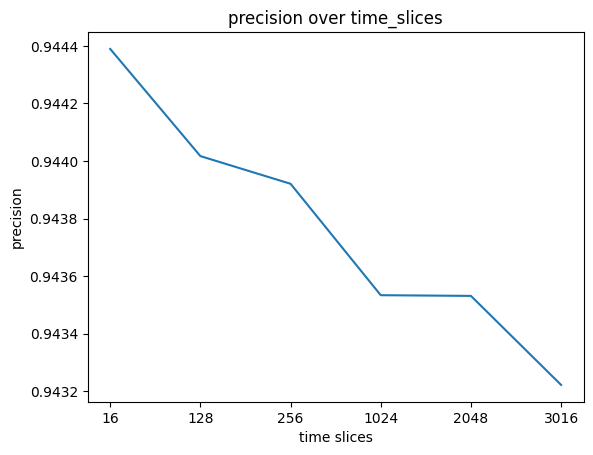

In [8]:
equidistant_x = np.arange(len(time_slices))
feature_to_print = 'precision'

plt.plot(equidistant_x, [report_clust[i].loc['weighted avg']['precision'] for i in time_slices])

plt.title(f'{feature_to_print} over time_slices')
plt.xticks(equidistant_x, time_slices)
plt.xlabel('time slices')
plt.ylabel(f'{feature_to_print}')
plt.show()

## Just COMPLETE 1/300

In [3]:
import re

best_models_dir = 'C:/Users/daddy/Desktop/VM data/results/reports/justifiablegranularity_300_20241121-164125'

report_just = {}

for model in tqdm(os.listdir(best_models_dir)):
    if 'report' not in model:
        continue

    file_path = os.path.join(best_models_dir, model)
    number = int(re.search(r'\d+', model).group())
    
    report_just[number] = pd.read_csv(file_path, index_col=0, float_precision='high')


100%|██████████| 7/7 [00:00<00:00, 128.65it/s]


## Clust and Just 1/300

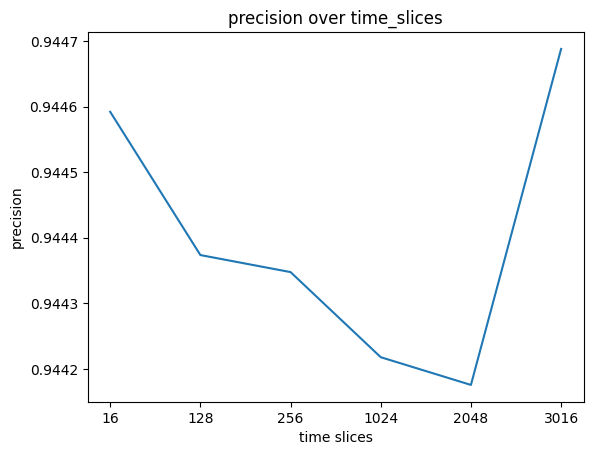

In [13]:
equidistant_x = np.arange(len(time_slices))
feature_to_print = 'precision'

ordered_result = []

plt.plot(equidistant_x, [report_just[i].loc['weighted avg']['precision'] for i in time_slices])

plt.title(f'{feature_to_print} over time_slices')
plt.xticks(equidistant_x, time_slices)
plt.xlabel('time slices')
plt.ylabel(f'{feature_to_print}')
plt.show()

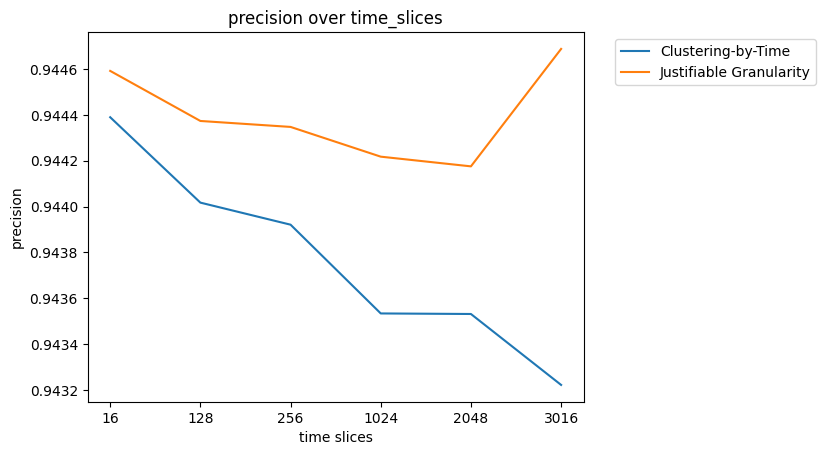

In [ ]:
plt.plot(equidistant_x, [report_clust[i].loc['weighted avg']['precision'] for i in time_slices], label='Clustering-by-Time')
plt.plot(equidistant_x, [report_just[i].loc['weighted avg']['precision'] for i in time_slices], label='Justifiable Granularity')

plt.title(f'{feature_to_print} over time_slices')
plt.xticks(equidistant_x, time_slices)
plt.xlabel('time slices')
plt.ylabel(f'{feature_to_print}')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()